# Data Analyst Udacity Nanodegree
# Wrangle and Analyze Project

### By Liliana Hirugame
<a id='table'></a>
## Table of Contents
- Introduction

- Part I - Gathering the data
    - [Reading a CSV file](#csv)
    - [Requesting a TSV file to a server](#tsv)
    - [Reading a JSON file through an API](#json)
    

- Part II - Assessing and cleaning
    - [Key Points](#key)
    - [Making copies](#copies)
    
    - [Exploring the twitter_archive table](#explore1)
    - [Exploring the image_predictions table](#explore2)
    - [Exploring the tweet_json_df table](#explore3)
    
    - [Assesment and cleaning index](#assess1)
    - [Cleaning the twitter_archive table](#clean1) 
    - [Cleaning the image_predictions table](#clean2) 
    - [Cleaning the tweet_json_df table](#clean3)
        
    - [Storing Data](#storing)
    
- Part III - Analysis and Visualization
    - [Which interface are tweets being sent from?](#interface)
    - [Top 10 tweeted dog breeds](#toptweeted)
    - [Rating means variation by breed](#ratingbybreed)
    - [Top 10 Rating means by breed](#top10bybreed)

- [References](#ref)

<a id='intro'></a>
### Introduction

This project is focused in the gathering, assessing, and cleaning of data from the https://twitter.com/dog_rates site and files related. 

#### Imports

In [59]:
import pandas as pd
import requests
import os
import tweepy    # for the Tweeter API, Tweepy
import json      # for JSON reading
import time
import numpy as np
import matplotlib.pyplot as plt
import re


[Return to Table of Contents](#table)
<a id='csv'></a>
## Gathering the data

I will present three ways of obtaining data 
#### 1. Reading a given csv file from the current folder 

In [5]:
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')

<a id='tsv'></a>
#### 2. Getting a file hosted on a server, and downloading it programmatically using the Requests library 

In [6]:
# Set the url where the file is hosted
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

# Get the response from the request.get. The response is in binary
response = requests.get(url)
# Write it down to a file named 'image-predictions.tsv'
with open(os.path.join( url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

# Read the file using tabs as separators
image_predictions = pd.read_csv( 'image-predictions.tsv', sep='\t')


<a id='json'></a>
#### 3. Getting a JSON file through Tweepy library, a Twitter's API  

By getting a Developer account for Tweeter, we are able to request the tweets by their IDs in JSON format.
.
Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line.

In [425]:
# The developer account provides the consumer key and secret, and the access token and secret
consumer_key = '###'
consumer_secret = '###'
access_token = '###'
access_secret = '###'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

We'll use the WeRateDogs tweet IDs from the Twitter archive.

In [5]:
tweet_ids = twitter_arch.tweet_id
ids_ok = []
ids_errors = []

Of course, we want to know how many tweets we'll be expecting, so we can keep calm while waiting for the process

In [7]:
twitter_arch.shape[0]

2356

There will be 2356 tweets, then the counter will count from 0 to 2355.

Each tweet's entire set of JSON data will be written to its own line in a file called tweet_json.txt file. 

The start and end timers will take the time of requesting and writing all JSONs.

In [7]:
start = time.time()
counter = 0

for my_id in tweet_ids:
    try:        
        # 'a' mode opens a file for appending. The file pointer is at the end of the file if the file exists. 
        # That is, the file is in the append mode. If the file does not exist, it creates a new file for writing.
        with open('tweet_json.txt', 'a') as outfile:
            tweet = api.get_status(my_id, tweet_mod='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            
        ids_ok.append(my_id)
        print(str(counter) + 'ok: ' + str(my_id))
        counter+=1
    except Exception as e:
        print(str(counter) + str(my_id) + ": " +str(e) )
        ids_errors.append(my_id)
        counter+=1
        

end = time.time()
print("Total time in seconds: " + str(end - start))

0ok: 892420643555336193
1ok: 892177421306343426
2ok: 891815181378084864
3ok: 891689557279858688
4ok: 891327558926688256
5ok: 891087950875897856
6ok: 890971913173991426
7ok: 890729181411237888
8ok: 890609185150312448
9ok: 890240255349198849
10ok: 890006608113172480
11ok: 889880896479866881
12ok: 889665388333682689
13ok: 889638837579907072
14ok: 889531135344209921
15ok: 889278841981685760
16ok: 888917238123831296
17ok: 888804989199671297
18ok: 888554962724278272
19888202515573088257: [{'code': 144, 'message': 'No status found with that ID.'}]
20ok: 888078434458587136
21ok: 887705289381826560
22ok: 887517139158093824
23ok: 887473957103951883
24ok: 887343217045368832
25ok: 887101392804085760
26ok: 886983233522544640
27ok: 886736880519319552
28ok: 886680336477933568
29ok: 886366144734445568
30ok: 886267009285017600
31ok: 886258384151887873
32ok: 886054160059072513
33ok: 885984800019947520
34ok: 885528943205470208
35ok: 885518971528720385
36ok: 885311592912609280
37ok: 885167619883638784
38o

300ok: 836753516572119041
301ok: 836677758902222849
302ok: 836648853927522308
303ok: 836397794269200385
304ok: 836380477523124226
305ok: 836260088725786625
306ok: 836001077879255040
307ok: 835685285446955009
308ok: 835574547218894849
309ok: 835536468978302976
310ok: 835309094223372289
311ok: 835297930240217089
312ok: 835264098648616962
313ok: 835246439529840640
314ok: 835172783151792128
315ok: 835152434251116546
316ok: 834931633769889797
317ok: 834786237630337024
318ok: 834574053763584002
319ok: 834477809192075265
320ok: 834458053273591808
321ok: 834209720923721728
322ok: 834167344700198914
323ok: 834089966724603904
324ok: 834086379323871233
325ok: 833863086058651648
326ok: 833826103416520705
327ok: 833732339549220864
328ok: 833722901757046785
329ok: 833479644947025920
330ok: 833124694597443584
331ok: 832998151111966721
332ok: 832769181346996225
333ok: 832757312314028032
334ok: 832682457690300417
335ok: 832645525019123713
336ok: 832636094638288896
337ok: 832397543355072512
338ok: 83236

611ok: 797165961484890113
612ok: 796904159865868288
613ok: 796865951799083009
614ok: 796759840936919040
615ok: 796563435802726400
616ok: 796484825502875648
617ok: 796387464403357696
618ok: 796177847564038144
619ok: 796149749086875649
620ok: 796125600683540480
621ok: 796116448414461957
622ok: 796080075804475393
623ok: 796031486298386433
624ok: 795464331001561088
625ok: 795400264262053889
626ok: 795076730285391872
627ok: 794983741416415232
628ok: 794926597468000259
629ok: 794355576146903043
630ok: 794332329137291264
631ok: 794205286408003585
632ok: 793962221541933056
633ok: 793845145112371200
634ok: 793614319594401792
635ok: 793601777308463104
636ok: 793500921481273345
637ok: 793286476301799424
638ok: 793271401113350145
639ok: 793256262322548741
640ok: 793241302385262592
641ok: 793226087023144960
642ok: 793210959003287553
643ok: 793195938047070209
644ok: 793180763617361921
645ok: 793165685325201412
646ok: 793150605191548928
647ok: 793135492858580992
648ok: 793120401413079041
649ok: 79291

Rate limit reached. Sleeping for: 546


900ok: 758740312047005698
901ok: 758474966123810816
902ok: 758467244762497024
903ok: 758405701903519748
904ok: 758355060040593408
905ok: 758099635764359168
906ok: 758041019896193024
907ok: 757741869644341248
908ok: 757729163776290825
909ok: 757725642876129280
910ok: 757611664640446465
911ok: 757597904299253760
912ok: 757596066325864448
913ok: 757400162377592832
914ok: 757393109802180609
915ok: 757354760399941633
916ok: 756998049151549440
917ok: 756939218950160384
918ok: 756651752796094464
919ok: 756526248105566208
920ok: 756303284449767430
921ok: 756288534030475264
922ok: 756275833623502848
923ok: 755955933503782912
924ok: 755206590534418437
925ok: 755110668769038337
926ok: 754874841593970688
927ok: 754856583969079297
928ok: 754747087846248448
929ok: 754482103782404096
930ok: 754449512966619136
931ok: 754120377874386944
932754011816964026368: [{'code': 144, 'message': 'No status found with that ID.'}]
933ok: 753655901052166144
934ok: 753420520834629632
935ok: 753398408988139520
936ok: 

1206ok: 715758151270801409
1207ok: 715733265223708672
1208ok: 715704790270025728
1209ok: 715696743237730304
1210ok: 715680795826982913
1211ok: 715360349751484417
1212ok: 715342466308784130
1213ok: 715220193576927233
1214ok: 715200624753819648
1215ok: 715009755312439296
1216ok: 714982300363173890
1217ok: 714962719905021952
1218ok: 714957620017307648
1219ok: 714631576617938945
1220ok: 714606013974974464
1221ok: 714485234495041536
1222ok: 714258258790387713
1223ok: 714251586676113411
1224ok: 714214115368108032
1225ok: 714141408463036416
1226ok: 713919462244790272
1227ok: 713909862279876608
1228ok: 713900603437621249
1229ok: 713761197720473600
1230ok: 713411074226274305
1231ok: 713177543487135744
1232ok: 713175907180089344
1233ok: 712809025985978368
1234ok: 712717840512598017
1235ok: 712668654853337088
1236ok: 712438159032893441
1237ok: 712309440758808576
1238ok: 712097430750289920
1239ok: 712092745624633345
1240ok: 712085617388212225
1241ok: 712065007010385924
1242ok: 711998809858043904
1

1510ok: 691444869282295808
1511ok: 691416866452082688
1512ok: 691321916024623104
1513ok: 691096613310316544
1514ok: 691090071332753408
1515ok: 690989312272396288
1516ok: 690959652130045952
1517ok: 690938899477221376
1518ok: 690932576555528194
1519ok: 690735892932222976
1520ok: 690728923253055490
1521ok: 690690673629138944
1522ok: 690649993829576704
1523ok: 690607260360429569
1524ok: 690597161306841088
1525ok: 690400367696297985
1526ok: 690374419777196032
1527ok: 690360449368465409
1528ok: 690348396616552449
1529ok: 690248561355657216
1530ok: 690021994562220032
1531ok: 690015576308211712
1532ok: 690005060500217858
1533ok: 689999384604450816
1534ok: 689993469801164801
1535ok: 689977555533848577
1536ok: 689905486972461056
1537ok: 689877686181715968
1538ok: 689835978131935233
1539ok: 689661964914655233
1540ok: 689659372465688576
1541ok: 689623661272240129
1542ok: 689599056876867584
1543ok: 689557536375177216
1544ok: 689517482558820352
1545ok: 689289219123089408
1546ok: 689283819090870273
1

Rate limit reached. Sleeping for: 544


1800ok: 676975532580409345
1801ok: 676957860086095872
1802ok: 676949632774234114
1803ok: 676948236477857792
1804ok: 676946864479084545
1805ok: 676942428000112642
1806ok: 676936541936185344
1807ok: 676916996760600576
1808ok: 676897532954456065
1809ok: 676864501615042560
1810ok: 676821958043033607
1811ok: 676819651066732545
1812ok: 676811746707918848
1813ok: 676776431406465024
1814ok: 676617503762681856
1815ok: 676613908052996102
1816ok: 676606785097199616
1817ok: 676603393314578432
1818ok: 676593408224403456
1819ok: 676590572941893632
1820ok: 676588346097852417
1821ok: 676582956622721024
1822ok: 676575501977128964
1823ok: 676533798876651520
1824ok: 676496375194980353
1825ok: 676470639084101634
1826ok: 676440007570247681
1827ok: 676430933382295552
1828ok: 676263575653122048
1829ok: 676237365392908289
1830ok: 676219687039057920
1831ok: 676215927814406144
1832ok: 676191832485810177
1833ok: 676146341966438401
1834ok: 676121918416756736
1835ok: 676101918813499392
1836ok: 676098748976615425
1

2104ok: 670668383499735048
2105ok: 670474236058800128
2106ok: 670468609693655041
2107ok: 670465786746662913
2108ok: 670452855871037440
2109ok: 670449342516494336
2110ok: 670444955656130560
2111ok: 670442337873600512
2112ok: 670435821946826752
2113ok: 670434127938719744
2114ok: 670433248821026816
2115ok: 670428280563085312
2116ok: 670427002554466305
2117ok: 670421925039075328
2118ok: 670420569653809152
2119ok: 670417414769758208
2120ok: 670411370698022913
2121ok: 670408998013820928
2122ok: 670403879788544000
2123ok: 670385711116361728
2124ok: 670374371102445568
2125ok: 670361874861563904
2126ok: 670338931251150849
2127ok: 670319130621435904
2128ok: 670303360680108032
2129ok: 670290420111441920
2130ok: 670093938074779648
2131ok: 670086499208155136
2132ok: 670079681849372674
2133ok: 670073503555706880
2134ok: 670069087419133954
2135ok: 670061506722140161
2136ok: 670055038660800512
2137ok: 670046952931721218
2138ok: 670040295598354432
2139ok: 670037189829525505
2140ok: 670003130994700288
2

Once tweet_json.txt is completed, we'll proceed to open it with the json library, and get the tweet ID, retweet count, and favorite count.

Personally, I'd prefer getting this data directly from the tweet object
```python
tweet = api.get_status(my_id, tweet_mod='extended')
favorite_count = tweet.favorite_count
retweet_count = tweet.retweet_count
```
But I shall demonstrate some skills with the json library :O

We'll verify the file has been saved in the current directory.

In [8]:
os.listdir( os.curdir )

['TEST.ipynb',
 'image-predictions.tsv',
 '.ipynb_checkpoints',
 'tweet_json.txt',
 'wrangle_act.ipynb',
 'twitter-archive-enhanced.csv']

Now it will be stored in `tweet_json_df` and read as multiple JSON in multiple lines, for which the `lines = True` parameter is used.

In [8]:
tweet_json_df = pd.read_json('tweet_json.txt', lines=True)

[Return to Table of Contents](#table)
<a id='key'></a>
## Key Points for assessing and cleaning

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.


[Return to Table of Contents](#table)
<a id='explore1'></a>
## Exploring the `twitter_archive` table

In [11]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_arch.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2302,667012601033924608,NaN,NaN,2015-11-18 16:12:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Klevin. He laughs a lot. Very cool dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667012601...,9,10,Klevin,None,None,None,None
1837,676089483918516224,NaN,NaN,2015-12-13 17:21:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yes hello I'ma just snag this here toasted ba...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/676089483...,9,10,None,None,None,None,None
1411,698989035503689728,NaN,NaN,2016-02-14 21:55:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He does toe touches in his sle...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698989035...,13,10,Oliver,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None


Check if there are any duplicated rows

In [13]:
twitter_arch.duplicated().sum()

0

Check the rows with a value in the `in_reply_to_status_id` column

In [14]:
twitter_arch.query('in_reply_to_status_id >0')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [15]:
twitter_arch.query('in_reply_to_status_id >0').shape[0]

78

Check the `timestamp` data type

In [16]:
twitter_arch_clean['timestamp'].dtype

dtype('O')

The timestamp column data type is 'O', it means object, string type.

Check the attributes of the `doggo`,`floofer`, `pupper`, `puppo` columns

In [17]:
twitter_arch.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [18]:
twitter_arch.pupper.unique()

array(['None', 'pupper'], dtype=object)

In [19]:
twitter_arch[twitter_arch['doggo']=='doggo'].iloc[:, np.r_[0,5,12,13,14,15,16]]

,tweet_id,text,name,doggo,floofer,pupper,puppo
9,890240255349198849,This is Cassie. She is a college pup. Studying...,Cassie,doggo,None,None,None
43,884162670584377345,Meet Yogi. He doesn't have any important dog m...,Yogi,doggo,None,None,None
99,872967104147763200,Here's a very large dog. He has a date later. ...,None,doggo,None,None,None
108,871515927908634625,This is Napolean. He's a Raggedy East Nicaragu...,Napolean,doggo,None,None,None
110,871102520638267392,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,None,doggo,None,None,None
121,869596645499047938,This is Scout. He just graduated. Officially a...,Scout,doggo,None,None,None
172,858843525470990336,I have stumbled puppon a doggo painting party....,None,doggo,None,None,None
191,855851453814013952,Here's a puppo participating in the #ScienceMa...,None,doggo,None,None,puppo
200,854010172552949760,"At first I thought this was a shy doggo, but i...",None,doggo,floofer,None,None
211,851953902622658560,RT @dog_rates: This is Astrid. She's a guide d...,Astrid,doggo,None,None,None


In [20]:
twitter_arch.in_reply_to_user_id.sample(5)

1095   NaN
1559   NaN
375    NaN
1551   NaN
1381   NaN
Name: in_reply_to_user_id, dtype: float64

In [21]:
twitter_arch.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [22]:
twitter_arch['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [23]:
twitter_arch['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

The common denominator used in WeRateDogs is 10. Let's check the texts with different values

In [24]:
denominators_not_10 = twitter_arch.query("rating_denominator!=10")
denominators_not_10['text'] 

313     @jonnysun @Lin_Manuel ok jomny I know you're e...
342              @docmisterio account started on 11/15/15
433     The floofs have been released I repeat the flo...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
784     RT @dog_rates: After so many requests, this is...
902     Why does this never happen at my front door......
1068    After so many requests, this is Bretagne. She ...
1120    Say hello to this unbelievably well behaved sq...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1598    Yes I do realize a rating of 4/20 would've bee...
1634    Two sneaky puppers were not initially seen, mo...
1635    Someon

We are not able to see the whole texts! But if we try one by one we can see the text nicely

In [25]:
twitter_arch['text'][313]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [26]:
for text in (denominators_not_10['text'] ):
    print (text)

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
@docmisterio account started on 11/15/15
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
This is Bluebert. He just saw that both #Fin

In [27]:
denominators_not_10.shape[0] / twitter_arch.shape[0]

0.009762308998302207

The rows with denominators different than 10 are 0.976% of the total rows in twitter_arch dataset

In [28]:
twitter_arch['rating_denominator'][313]

0

In [29]:
twitter_arch.shape

(2356, 17)

In [30]:
twitter_arch['rating_denominator'][342]

15

I can see some of the denominators like 70, 150, 90, 50, 130 are ok, since they are rating several dogs in one photo. 

Some others are incorrect, like in the first one "but 960/00 isn't a valid rating, 13/10 is tho". The correct denominator is 10, not 00. 

Also the second one "@docmisterio account started on 11/15/15", neither "He just robbed a 7/11 and is in a high speed", which means a 7eleven.

In [31]:
twitter_arch['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

[Return to Table of Contents](#table)
<a id='explore2'></a>
## Exploring the `image_predictions` table

In [225]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [189]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1485,781661882474196992,https://pbs.twimg.com/media/CtkFS72WcAAiUrs.jpg,1,Pembroke,0.438087,True,golden_retriever,0.226954,True,collie,0.070652,True
1956,864873206498414592,https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,2,pole,0.478616,False,lakeside,0.114182,False,wreck,0.055926,False
360,672640509974827008,https://pbs.twimg.com/media/CVWy9v-VAAALSoE.jpg,1,Chesapeake_Bay_retriever,0.420155,True,Cardigan,0.266030,True,Labrador_retriever,0.042514,True
673,683357973142474752,https://pbs.twimg.com/media/CXvGbWeWMAcRbyJ.jpg,1,Pembroke,0.406509,True,Cardigan,0.154854,True,Siberian_husky,0.136366,True
1464,778408200802557953,https://pbs.twimg.com/media/Cs12ICuWAAECNRy.jpg,3,Pembroke,0.848362,True,Cardigan,0.108124,True,beagle,0.011942,True


In [190]:
image_predictions['img_num'].unique()

array([1, 4, 2, 3])

There are up to 4 photos per tweet

In [191]:
image_predictions['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

There are a lot of values for predictions... not recommendable to set as categorical data, but could clean some values with underscore and write a space instead.


In [192]:
image_predictions.duplicated().sum()

0

It seems there are no duplicated registers

The next are the URLs of the images not predicted as dogs

In [193]:
image_predictions[image_predictions['p1_dog']==False]['jpg_url']

6         https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg
8         https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg
17        https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg
18        https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg
21        https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg
22        https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg
25        https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg
29        https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg
33        https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg
43        https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg
45        https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg
50        https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg
51        https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg
52        https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg
53        https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg
56        https://pbs.twimg.com/media/CUHkkJpXIAA2w3n.jpg
69        https://pbs.twimg.com/media/CUJUk2iWUAAVtOv.jpg
73        http

I checked some of the above URLs, some of them are not dogs, like a jiraffe, a turtle, or cartoons. But some of them are actually dogs, just that the machine learning algorithm didn't recognize them. We have no way to use or modify the algorithm, so we'll leave them as they are.

[Return to Table of Contents](#table)
<a id='explore3'></a>
## Exploring the `tweet_json_df` table

In [207]:
tweet_json_clean=tweet_json_df.copy()

In [208]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
entities                         2342 non-null object
extended_entities                1823 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null bool
geo                              0 non-null float64
id                               2342 non-null int64
id_str                           2342 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  2342 non-null bool
lang                             2342 no

All values are NaN (Not a Number) in the `contributors`, `coordinates`, and `geo` columns.

In [209]:
tweet_json_df.sample(5)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1623,NaN,NaN,2016-01-05 02:09:54,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 684195074750599168, 'id_str'...",2016,False,NaN,684195085588783105,684195085588783104,...,NaN,NaN,NaN,560,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tino. He really likes corndogs. 9/10 h...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
468,NaN,NaN,2017-01-02 17:00:46,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 815965888126062592, 'id_str'...",24011,False,NaN,815966073409433600,815966073409433600,...,NaN,NaN,NaN,9331,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper with squeaky hiccups. Please e...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
143,NaN,NaN,2017-05-13 16:15:35,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,2276,False,NaN,863427515083354112,863427515083354112,...,NaN,NaN,NaN,99,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1856,NaN,NaN,2015-12-11 03:05:37,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675149402210701313, 'id_str'...",3861,False,NaN,675149409102012420,675149409102012416,...,NaN,NaN,NaN,1767,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",holy shit 12/10 https://t.co/p6O8X93bTQ,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
782,NaN,NaN,2016-09-07 01:47:12,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,773336787167145985,773336787167145984,...,NaN,NaN,NaN,5562,False,{'created_at': 'Thu Sep 01 16:14:48 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Fizz. She thinks love is a...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [210]:
tweet_json_df['favorited'].unique()

array([False])

All values are False in the `favorited` column

There is only 1 row with a non-null value for 'place'. It is this one, a JSON object!

In [211]:
[x for x in tweet_json_df['place'] if x != None]

[{'id': '7356b662670b2c31',
  'url': 'https://api.twitter.com/1.1/geo/id/7356b662670b2c31.json',
  'place_type': 'city',
  'name': 'Clifton',
  'full_name': 'Clifton, NJ',
  'country_code': 'US',
  'country': 'United States',
  'contained_within': [],
  'bounding_box': {'type': 'Polygon',
   'coordinates': [[[-74.1977277, 40.82028],
     [-74.118533, 40.82028],
     [-74.118533, 40.899384],
     [-74.1977277, 40.899384]]]},
  'attributes': {}}]

More JSON objects in the `'entities'` column

In [212]:
tweet_json_df['entities'][0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

[Return to Table of Contents](#table)
<a id='copies'></a>
## Making copies

The first step before any cleaning is **always make copies**

In [9]:
twitter_arch_clean = twitter_arch.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json_df.copy()

[Return to Table of Contents](#table)
<a id='assess1'></a>
## Assesment and cleaning index

As part of the assesment, it is suggested to take into account the following issues, and proceed with their solution:

#### Quality
1. [Retweets are not needed (rows)](#retweetrows)
2. [Columns related to retweeted info are not needed](#retweetcols)
3. [in_reply_to columns have wrong datatypes](#in_reply) 
4. [Timestamp has object (string) data type](#timestamp)
5. [The values in the source column have the whole `<a href>` tags](#source) 
6. [Fix the strange rating numerators](#ratings)
7. [Denominators different than 10 have different issues](#denom10)
8. [The `doggo`, `floofer`, `pupper`, `puppo` columns are values, not variable names](#stage)
9. [Change the prediction data column names for more descriptive ones](#moredescriptive)
10. [Handling missing info after merging tables](#missing)
11. [Change the underscores in predictions by spaces](#underscores)


#### Tidiness
a) [Join the image prediction data to twitter_archive_clean table](#merge1)

b) [Join the retweet count and favorite count to twitter_archive_clean table](#merge2)


[Return to Table of Contents](#table)
<a id='clean1'></a><a id='retweetrows'></a>
## Cleaning the `twitter archive` table

### 1. Retweets are not needed
`retweeted_status_id` and `retweeted_status_user_id` columns which are in float format, and `retweeted_status_timestamp` which is in object (string) format, are part of retweet info

##### Define
The rows with a value different from NaN in the `retweeted_status_user_id` will be deleted. Don't forget to reset the index.

##### Code

There are 2356 rows in the twitter_arch df

In [10]:
twitter_arch.shape

(2356, 17)

And there are 181 retweets which must be removed

In [11]:
twitter_arch.query('retweeted_status_user_id > 0').shape

(181, 17)

In [12]:
# All tweets with retweeted_status_user_id as NaN are not retweets
# check "Querying for NaN and other names in Pandas" in stackoverflow
twitter_arch_clean = twitter_arch_clean.query('retweeted_status_user_id != retweeted_status_user_id')

In [13]:
# And reset the index in rows
twitter_arch_clean  = twitter_arch_clean.reset_index()
del twitter_arch_clean['index']

#### Test

The 181 values with retweets have been removed

In [14]:
2356-181

2175

In [15]:
twitter_arch_clean.shape

(2175, 17)

[Return to Assesment](#assess1)
<a id='retweetcols'></a>
### 2. Columns related to retweeted info are not needed

#### Define
The columns `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` will be deleted with the df.drop function

#### Code

In [16]:
# where 1 is the axis number (0 for rows and 1 for columns.)
twitter_arch_clean = twitter_arch_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], 1)


#### Test

Columns with retweet info do not appear anymore

In [17]:
twitter_arch_clean.columns.get_values()

array(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper',
       'puppo'], dtype=object)

[Return to Assesment](#assess1)
<a id='in_reply'></a>
### 3. in_reply_to columns have wrong datatypes 
It is not clear if the in_reply_to columns are needed or must be deleted like the retweet columns.
Due to the uncertainty, the columns won't be dropped, but the datatypes will be fixed to string type.

#### Define
At this moment, `in_reply_to_status_id` and `in_reply_to_user_id` are float64. First change the NaN values to sentinel 0. Then change to int datatype.

#### Code

In [18]:
twitter_arch_clean[twitter_arch_clean['in_reply_to_status_id']!=twitter_arch_clean['in_reply_to_status_id']].shape[0]

2097

There are 2097 values with NaN in these columns

In [19]:
twitter_arch_clean['in_reply_to_status_id'] = twitter_arch_clean['in_reply_to_status_id'].fillna(0)
twitter_arch_clean['in_reply_to_user_id'] = twitter_arch_clean['in_reply_to_user_id'].fillna(0)

In [20]:
twitter_arch_clean[twitter_arch_clean['in_reply_to_status_id']==0].shape[0]

2097

In [21]:
twitter_arch_clean['in_reply_to_status_id'] = twitter_arch_clean['in_reply_to_status_id'].astype(int)
twitter_arch_clean['in_reply_to_user_id'] = twitter_arch_clean['in_reply_to_user_id'].astype(int)

#### Test

In [22]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    2175 non-null int64
in_reply_to_user_id      2175 non-null int64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: int64(5), object(9)
memory usage: 238.0+ KB


In [23]:
twitter_arch_clean.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
860,744709971296780288,0,0,2016-06-20 01:54:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harvey. He's stealthy af. 10/10 would ...,https://twitter.com/dog_rates/status/744709971...,10,10,Harvey,None,None,None,None
819,748568946752774144,0,0,2016-06-30 17:28:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cora. She rings a bell for treats. 12/...,https://twitter.com/dog_rates/status/748568946...,12,10,Cora,None,None,None,None
788,750719632563142656,0,0,2016-07-06 15:54:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Meyer. He has to hold somebody's hand ...,https://twitter.com/dog_rates/status/750719632...,12,10,Meyer,None,None,None,None
2028,668627278264475648,0,0,2015-11-23 03:09:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timofy. He's a pilot for Southwest. It...,https://twitter.com/dog_rates/status/668627278...,9,10,Timofy,None,None,None,None


[Return to Assesment](#assess1)
<a id='timestamp'></a>
### 4. Timestamp has object (string) data type

#### Define
Change it to pandas datetime64 type with to_datetime function

#### Code

In [24]:
twitter_arch_clean['timestamp'] = (pd.to_datetime(twitter_arch_clean['timestamp']))

#### Test

In [25]:
twitter_arch_clean['timestamp'].dtype

dtype('<M8[ns]')

[Return to Assesment](#assess1)
<a id='source'></a>
### 5. The values in the `source` column have the whole `<a href>` tags. 
We only need the text inside them

#### Define
Let's use BeautifulSoup, an HTML parser to get the text inside the tags, and rewrite the values for that column. 
Store them as categorical data

#### Code

In [26]:
from bs4 import BeautifulSoup

for index in range(twitter_arch_clean.shape[0]):
    # take new text in 'source' column for each index
    html_text = twitter_arch_clean.source[index] 
    soup = BeautifulSoup(html_text, 'html.parser')
    # rewrite 'source' text
    # gets the text inside the 'a' tag 
    twitter_arch_clean.iloc[index,4] = soup.a.text


##### Test

In [27]:
twitter_arch_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

Yeeeey!!! :)

[Return to Assesment](#assess1)
<a id='ratings'></a>
### 6.  Fix the strange rating numerators
- Some of the rating numerators are not accurate because the decimals was not taken into account, as shown in:<p>
    **(index 558)**
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS<p>
    **(index 617)**
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq<p>

- Some other texts have two numbers separated by a slash, being the first one part of the comment, and the second one the actual rating, as in this examples:<p>
    **(index 263)**
    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho<p>
    **(index 52)**
    @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s

#### Define
Define a regular expression which matches multiple occurrences of, for example, 17/10 as well as 9.75/10<p>
Select the last occurrence, and assign the first number as numerator, the last number as denominator<p>
Save numerators as float and denominators as int

#### Code


In [28]:
# This step uses the library re
# regex1 matches (one or more digits)(optional dot)(one or more digits)(slash symbol)(one or more digits)
# re.findall returns a list all occurrences that match, then we select the last one. 
# From this one, we assign the numerator and the denominator

regex1 = r"(\d+\.?\d*/\d+)"
regex2 = r"(\d*\.?\d+)"
errors=0

for index in twitter_arch_clean.index:
    text = twitter_arch_clean['text'][index]
    print (text)
    if re.search(regex1, text):
        match1 = re.findall(regex1, text)
        print(match1[-1])
        match2 = re.findall(regex2, match1[-1]) 
        # Assign numerator (column index 7) and denominator (column index 8) new values
        twitter_arch_clean.iloc[index,7] = float(match2[0])
        twitter_arch_clean.iloc[index,8] = int(match2[-1])
    else:
        errors = errors+1
        print("The regex pattern does not match. :(")

print("Total errors: ")
print(errors)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
13/10
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
12/10
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
13/10
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

This is Meatball. He doing what's known in the industry as a mid-strut mlem. H*ckin fancy boy. 12/10 I'd do anything for Meatball https://t.co/S2HdmFFPck
12/10
This is Paisley. She ate a flower just to prove she could. Savage af. 13/10 would pet so well https://t.co/cPq9fYvkzr
13/10
This is Albus. He's quite impressive at hide and seek. Knows he's been found this time. 13/10 usually elusive as h*ck https://t.co/ht47njyZ64
13/10
This is Neptune. He's a backpup vocalist for the Dixie Chicks. 13/10 (vid by @AmiWinehouse) https://t.co/tordvmaaop
13/10
This is Belle. She's never been more pupset. Encountered the worst imaginable type of zone. 12/10 would do anything to cheer pup https://t.co/fGQUzR8w3H
12/10
@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10
12/10
Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https:

@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10
15/10
This is Daisy. She's puppears to be rare as all h*ck. Only seven like her currently domesticated. 13/10 pettable af https://t.co/meUc8jufAO
13/10
Here's a pupper before and after being asked "who's a good girl?" Unsure as h*ck. 12/10 hint hint it's you https://t.co/ORiK6jlgdH
12/10
This is Waffles. He's a ship captain in real life and in @GoodDogsGame. Must've gotten to the max level (wink) 13/10 would sail with https://t.co/Z3LAaV2pKz
13/10
This is Vincent. He's suave as h*ck. Will be your copilot this evening. Claims he doesn't need to look at the directions. 12/10 https://t.co/u51tzXSVi3
12/10
This is Lucy. She has a portrait of herself on her ear. Excellent for identification pupposes. 13/10 innovative af https://t.co/uNmxbL2lns
13/10
This is Clark. He passed pupper training today. Round of appaws for Clark. 13/10 https://t.co/7pUjwe8X6B
13/10
This is Mookie. He really enjoys shopping but not from such high altit

This is Autumn. Her favorite toy is a cheeseburger. She takes it everywhere. 11/10 https://t.co/JlPug12E5Z
11/10
Looks like he went cross-eyed trying way too hard to use the force. 12/10 
https://t.co/bbuKxk0fM8
12/10
This is Buddy. He ran into a glass door once. Now he's h*ckin skeptical. 13/10 empowering af (vid by Brittany Gaunt) https://t.co/q2BgNIi3OA
13/10
This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
13/10
Say hello to Eugene &amp; Patti Melt. No matter how dysfunctional they get, they will never top their owners. Both 12/10 would pet at same time https://t.co/jQUdvtdYMu
12/10
This is Ken. His cheeks are magic. 13/10 (IG: ken_shiba) https://t.co/btzf1zTDeQ
13/10
Meet Strudel. He's rather h*ckin pupset that your clothes clash. 11/10 click the link to see how u can help Strudel

https://t.co/3uxgLz8d0l https://t.co/O0ECL1StB2
11/10
This is Tebow. He kindly request

This is Moreton. He's the Good Boy Who Lived. 13/10 magical as h*ck https://t.co/rLHGx3VAF3
13/10
Meet Dave. It's his favorite day of the year. He gets to fulfill his dream of being a dinosaur. 12/10 inspirational af https://t.co/MgQSdfZGPN
12/10
Oh h*ck look at this spookling right here. Fright level off the charts. 12/10 sufficiently spooked https://t.co/BNy9IIJMb0
12/10
This is Tucker. He's out here bustin h*ckin ghosts. 13/10 dedicated af https://t.co/Ap477GhwXt
13/10
This is Juno. She spooked me up real good, but only to get my attention. Above average handwriting for a dog I think. 11/10 https://t.co/hFxxBCWlwj
11/10
This is Maude. She's the h*ckin happiest wasp you've ever seen. 10/10 would pet with caution https://t.co/etL8FHBrh8
10/10
Say hello to Lily. She's pupset that her costume doesn't fit as well as last year. 12/10 poor puppo https://t.co/YSi6K1firY
12/10
This is Newt. He's a strawberry. 11/10 https://t.co/2VhmlwxA1Q
11/10
This is Benji. He's Air Bud. It's a low effort 

Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
10/10
This is Willem. He's a Penn State pupper. Thinks the hood makes him more intimidating. It doesn't. 12/10 https://t.co/Dp0s7MRIHK
12/10
Here's a couple rufferees making sure all the sports are played fairly today. Both 10/10 would bribe with extra pets https://t.co/H9yjI9eo3A
10/10
Meet Jack. He's a Clemson pup. Appears to be rather h*ckin pettable. Almost makes me want to root for Clemson. 12/10 https://t.co/GHOfbTVQti
12/10
This is Finn. He's very nervous for the game. Has a lot of money riding on it.10/10 would attempt to comfort https://t.co/CbtNfecWiT
10/10
This is Penny. She's an OU cheerleader. About to do a triple back handspring down the stairs. 11/10 hype af https://t.co/B2f3XkGU5c
11/10
Doggo will persevere. 13/10
https://t.co/yOVzAomJ6k
13/10
This is Davey. He'll have your daughter home by 8. Just a stand up pup. 11/10 would intro

This is Grizzie. She's a semi-submerged Bahraini Buttersplotch. Appears alert af. Snazzy tongue. 11/10 would def pet https://t.co/WZ4zzkXXnW
11/10
Nothing better than a doggo and a sunset. 10/10 majestic af https://t.co/xVSodF19PS
10/10
Hooman used Pokeball
*wiggle*
*wiggle*
Doggo broke free 
10/10 https://t.co/bWSgqnwSHr
10/10
Here are three doggos completely misjudging an airborne stick. Decent efforts tho. All 9/10 https://t.co/HCXQL4fGVZ
9/10
Hopefully this puppo on a swing will help get you through your Monday. 11/10 would push https://t.co/G54yClasz2
11/10
Here's a doggo trying to catch some fish. 8/10 futile af (vid by @KellyBauerx) https://t.co/jwd0j6oWLE
8/10
This is Brody. He's a lifeguard. Always prepared for rescue. 12/10 would fake drown just to get saved by him https://t.co/olDmwNjOy1
12/10
This is Lola. She's a surfing pupper. 13/10 magical af https://t.co/BlGQkhM5EV
13/10
This is Ruby. Her ice cube is melting. She doesn't know what to do about it. 11/10 https://t.co/Vfc

This is Chip. He only mowed half the yard. 8/10 quit the shit Chip we have other things to do https://t.co/LjzZKQ7vmK
8/10
Meet Baloo. He's expecting a fast ground ball, hence the wide stance. Prepared af. 11/10 nothing runs like a pupper https://t.co/sMbMw5Z2XC
11/10
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
14/10
When the photographer forgets to tell you where to look... 10/10 https://t.co/u1GHWxhC85
10/10
This is Chase. He's in a predicament. 9/10 help is on the way buddy https://t.co/0HmBk5sSbW
9/10
This is getting incredibly frustrating. This is a Mexican Golden Beaver. We only rate dogs. Only send dogs ...10/10 https://t.co/0yolOOyD3X
10/10
This is Nollie. She's waving at you. If you don't wave back you're a monster. She's also portable as hell. 12/10 https://t.co/7AKdkCOlMf
12/10
Say hello to Rorie. She's zen af. Just enjoying a treat in the sunlight. 10/10 would immediately trade 

This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
11/10
This is Stephanus. She stays woke. 12/10 https://t.co/WIWabMngQZ
12/10
Here's a super majestic doggo and a sunset 11/10 https://t.co/UACnoyi8zu
11/10
This is Bubbles. He's a Yorkshire Piccolope. 11/10 would snug aggressively https://t.co/3BhMojONxq
11/10
This is old now but it's absolutely heckin fantastic and I can't not share it with you all. 13/10  https://t.co/wJX74TSgzP
13/10
This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9
10/10
This is Bentley. He gives kisses back. 11/10 precious af (vid by @emmaallen25) https://t.co/9PnKkKzoUp
11/10
Meet Toby. He's a Lithuanian High-Steppin Stickeroo. One of the more accomplished Stickeroos around. 10/10 so nifty https://t.co/cYPHuJYTjC
10/10
This is Zeus. He's downright fabulous. 12/10 https://t.co/sSugyyRuTp
12/10
This is Bertson. H

Seriously, add us 🐶 11/10 for sad wet pupper https://t.co/xwPE9faVZR
11/10
"Ma'am, for the last time, I'm not authorized to make that type of transaction" 11/10 https://t.co/nPTBsdm3BF
11/10
Say hello to Zara. She found a sandal and couldn't be happier. 12/10 great work https://t.co/zQUuVu812n
12/10
This is Cooper. He only wakes up to switch gears. 12/10 helpful af https://t.co/EEIkAGVY64
12/10
This is Ambrose. He's an Alfalfa Ballyhoo. Draws pistol fast af. Pretty much runs the frontier. 11/10 lethal pupper https://t.co/ih6epBOxIA
11/10
This is Jimothy. He lost his body during the the Third Crusade (tragic). 11/10 heroic af tho https://t.co/wnsblfu7XE
11/10
This is Bode. He's a heavy sleeper. 9/10 https://t.co/YMkxhGWUqv
9/10
This is Terrenth. He just stubbed his toe. 10/10 deep breaths Terrenth https://t.co/Pg18CDFC7Z
10/10
This is Reese. He's a Chilean Sohcahtoa. Loves to swing. Never sure what to do with his feet. 12/10 huggable af https://t.co/VA6jnNUyuW
12/10
I found a forest Pip

This is Bob. He just got back from his job interview and realized his ear was inside-out the whole time. 10/10 https://t.co/lORINwFXIV
10/10
This is Colin. He really likes green beans. It's tearing his family apart. 10/10 please pray for Colin https://t.co/ioFy0cmK03
10/10
This is just a beautiful pupper good shit evolution. 12/10 https://t.co/2L8pI0Z2Ib
12/10
This is Lorenzo. He's educated af. Just graduated college. 11/10 poor pupper can't even comprehend his debt https://t.co/dH3GzcjCtQ
11/10
This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P
13/10
Meet Brian (pronounced "Kirk"). He's not amused by ur churlish tomfoolery. Once u put him down you're done for. 6/10 https://t.co/vityMwPKKi
6/10
Please only send in dogs. This t-rex is very scary. 5/10 ...might still pet (vid by @helizabethmicha) https://t.co/Vn6w5w8TO2
5/10
This is Archie. He's a Bisquick Taj Mapaw. Too many people are touching him. 

This is Mona. She's a Yarborough Splishnsplash. Lost body during Nam. 11/10 revolutionary pupper https://t.co/pgD6h0yhgz
11/10
This is Olivia. She just saw an adult wearing crocs. 11/10 poor pupper. No one should witness such a thing https://t.co/yJVTi1DjJc
11/10
Meet Horace. He was practicing his levitation, minding his own business when a rogue tennis ball spooked him. 10/10 https://t.co/tB9xYjMyZd
10/10
This pup's having a nightmare that he forgot to type a paper due first thing in the morning. 12/10 (vid by ... https://t.co/CufnbUT0pB
12/10
Say hello to Crimson. He's a Speckled Winnebago. Main passions are air hockey &amp; parkour. 11/10 would pet thoroughly https://t.co/J5aI7SjzDc
11/10
Meet Birf. He thinks he's gone blind. 10/10 very frightened pupper https://t.co/oDkspjNWYX
10/10
Heartwarming scene here. Son reuniting w father after coming home from deployment. Very moving. 10/10 for both pups https://t.co/95JJevQOWW
10/10
When bae calls your name from across the room. 12/10 (vi

Say hello to Panda. He's a Quackadilly Shooster. Not amused by your fake ball throwing motion. 9/10 would hug lots https://t.co/wL1iDvbcVk
9/10
This is Champ. He's being sacrificed to the Aztec sun god Huitzilopochtli. So sad. 10/10 Champ doesn't deserve this https://t.co/VGsziXImoy
10/10
I just love this pic. 11/10 this pupper is going places https://t.co/P16uhh1PbI
11/10
This is Aspen. He's astronomically fluffy. I wouldn't stop petting this dog if the world was ending around me 11/10 https://t.co/oBlgL9nxpx
11/10
I thought I made this very clear. We only rate dogs. Stop sending other things like this shark. Thank you... 9/10 https://t.co/CXSJZ4Stk3
9/10
This is Ozzie. He was doing fine until he lost traction in those festive socks. Now he's tired. 9/10 still killin it https://t.co/u4FYdIRKnY
9/10
This is Alice. She's an idiot. 4/10 https://t.co/VQXdwJfkyS
4/10
Say hello to Sadie. She's a Tortellini Sidewinder. Very jubilant pup. Seems loyal. Leaves on point. 10/10 petable af https:/

Meet Striker. He's ready for Christmas. 11/10 https://t.co/B3xxSLjQSH
11/10
Extremely rare pup here. Very religious. Always praying. Too many legs. Not overwhelmingly fluffy. Won't bark. 3/10 https://t.co/REyE5YKVBb
3/10
"Yes hello I'ma just snag this here toasted bagel real quick. carry on." 9/10 https://t.co/Cuz0Osnekp
9/10
I'm sure you've all seen this pupper. Not prepared at all for the flying disc of terror. 10/10 https://t.co/G0pQiFGM7O
10/10
This is Donny. He's summoning the demon monster Babadook. 6/10 Donny please no that won't be a good time for anyone https://t.co/kiW6Knb7Gp
6/10
Breathtaking scene. A father taking care of his newborn pup. Tugs at the heartstrings. 10/10 restores my faith https://t.co/06oZdehGEa
10/10
Ok, I'll admit this is a pretty adorable bunny hopping towards the ocean but please only send in dogs... 11/10 https://t.co/sfsVCGIipI
11/10
&amp; this is Yoshi. Another world record contender 11/10 (what the hell is happening why are there so many contenders?)

Magical floating dog here. Very calm. Always hangs by the pond. Rather moist. Good listener. 6/10 personally I'd pet https://t.co/1euKoOvy49
6/10
This is Dexter. He just got some big news. 10/10 https://t.co/CbvCUE6PFI
10/10
This is Fletcher. He's had a ruff night. No more Fireball for Fletcher. 8/10 it'll be over soon pupper https://t.co/tA4WpkI2cw
8/10
Say hello to Kenzie. She is a fluff ball. 12/10 you'd need to taser me for me to let go of her https://t.co/dph1UHNJrg
12/10
This is Pumpkin. He can look in two different directions at once. Great with a screwdriver. 8/10 https://t.co/odpuqtz2Fq
8/10
This is Schnozz. He's had a blurred tail since birth. Hasn't let that stop him. 10/10 inspirational pupper https://t.co/a3zYMcvbXG
10/10
Very happy pup here. Always smiling. Loves his little leaf. Carries it everywhere with him. 9/10 https://t.co/81BCQAyvcs
9/10
Extraordinary dog here. Looks large. Just a head. No body. Rather intrusive. 5/10 would still pet https://t.co/ufHWUFA9Pu
5/10
Th

*screams for a little bit and then crumples to the floor shaking* 12/10 https://t.co/W2MCt9pTed
12/10
Meet Danny. He's too good to look at the road when he's driving. Absolute menace. 6/10 completely irresponsible https://t.co/I1lMUy1FqH
6/10
This is Ester. He has a cocaine problem. This is an intervention Ester. We all care about you. 8/10 https://t.co/eCVj2xT59V
8/10
This is Pluto. He's holding little waddling dog hostage. Little waddling dog very desperate at this point sos. 8/10 https://t.co/HMcD9SLOAN
8/10
This is Bloo. He's a Westminster Cîroc. Doesn't think Bart deserves legs. Nice flowers. 8/10 https://t.co/IAc1QCczMc
8/10
This is Phineas. He's a magical dog. Only appears through the hole of a donut. 10/10 mysterious pup https://t.co/NECxEHN5YU
10/10
Honor to rate this dog. Great teeth. Nice horns. Unbelievable posture. Fun to pet. Big enough to ride. 10/10 rad dog https://t.co/7JMAHdJ6A4
10/10
This is Edd. He's a Czechoslovakian Googolplex Merlot. Ready for Christmas. Take tha

This is Marvin. He can tie a bow tie better than me. 11/10 https://t.co/81kzPgqjQ3
11/10
It is an honor to rate this pup. He is a Snorklhuahua from Amarillo. A true renaissance dog. Also part Rudolph 10/10 https://t.co/ALNyYuGui7
10/10
There's a lot going on here but in my honest opinion every dog pictured is pretty fabulous. 10/10 for all. Good dogs https://t.co/VvYVbsi6c3
10/10
This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10 https://t.co/stEodX9Aba
1/10
This is Gòrdón. He enjoys his razberrita by pool. Not a care in the world. 12/10 this dog has a better life than me https://t.co/zpdBQCcYgW
12/10
This is a Birmingham Quagmire named Chuk. Loves to relax and watch the game while sippin on that iced mocha. 10/10 https://t.co/HvNg9JWxFt
10/10
This is Jo. Jo is a Swedish Queso. Tongue bigger than face. Tiny lil legs. Still no seatbelt. Simply careless. 8/10 https://t.co/Edy7B5vOp2
8/10
Good teamwork between these dog

Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7
6/10
Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY
10/10
Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx
9/10
This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK
10/10
Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p
8/10
My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O
9/10
Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt
10/10
This is an odd dog. Hard on the outside but loving

#### Test

Re-evaluating the examples given in the definition (indexes 558, 617, 263, 52)

In [29]:
print ( twitter_arch_clean.iloc[558,5])
print ( twitter_arch_clean.iloc[617,5])
print ( twitter_arch_clean.iloc[263,5])
print ( twitter_arch_clean.iloc[52,5])    
twitter_arch_clean.iloc[np.r_[558,617,263,52],np.r_[5,7,8]]


This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s


,text,rating_numerator,rating_denominator
558,"This is Logan, the Chow who lived. He solemnly...",9.75,10
617,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10
263,@jonnysun @Lin_Manuel ok jomny I know you're e...,13.00,10
52,@roushfenway These are good dogs but 17/10 is ...,13.00,10


In [30]:
strange_numerators = twitter_arch_clean.query('rating_numerator >15 | rating_numerator <10')
for index in strange_numerators.index:
    print (twitter_arch_clean['text'][index])
    print (twitter_arch_clean['rating_numerator'][index])
    print (twitter_arch_clean['rating_denominator'][index])
    

@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
420.0
10
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
666.0
10
This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1
6.0
10
@markhoppus 182/10
182.0
10
When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
0.0
10
I was going to do 007/10, but the joke wasn't worth the &lt;10 rating
7.0
10
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
84.0
70
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
24.0
7
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*c

[Return to Assesment](#assess1)
<a id='denom10'></a>
### 7. Denominators different than 10 have different issues
The rows with denominators different than 10 have different causes of issue. 

Some of the denominators like 70, 150, 90, 50, 130 are rating several dogs in one photo. These makes innacurate assigning a unique rating, breed,etc, since there can be different dogs in one picture.

Some others are incorrect, like in the first one "but 960/00 isn't a valid rating, 13/10 is tho". The correct denominator is 10, not 00. 
And others have errors like:   "@docmisterio account started on 11/15/15", neither "He just robbed a 7/11 and is in a high speed", which means a 7eleven.

It is difficult to generalize a fix, and since all these cases are 0.976% of the total rows in twitter_arch dataset, the impact of fixing them is not notable, and it is less time consuming dropping all of them.

#### Define
Redefine the denominators_not_10 variable. Drop these cases and reset the index.

In [31]:
denominators_not_10 = twitter_arch_clean.query("rating_denominator!=10")
axex_to_drop=list( denominators_not_10.axes[0])
axex_to_drop

[287,
 363,
 429,
 733,
 942,
 1050,
 1075,
 1095,
 1172,
 1254,
 1419,
 1455,
 1456,
 1484,
 1600,
 1664]

In [32]:
twitter_arch_clean.drop(axex_to_drop,axis=0)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,0,0,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None
1,892177421306343426,0,0,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None
2,891815181378084864,0,0,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None
3,891689557279858688,0,0,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None
4,891327558926688256,0,0,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None
5,891087950875897856,0,0,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,None,None,None,None
6,890971913173991426,0,0,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,None,None,None,None
7,890729181411237888,0,0,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,None,None,None,None
8,890609185150312448,0,0,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,None,None,None,None
9,890240255349198849,0,0,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,None,None,None


In [33]:
# And reset the index in rows
twitter_arch_clean  = twitter_arch_clean.reset_index()
del twitter_arch_clean['index']

[Return to Assesment](#assess1)
<a id='stage'></a>
### 8. The `doggo`, `floofer`, `pupper`, `puppo` columns are values, not variable names 

They refer to the same variable: stage.

As the tidy [data rules](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) state: "Column headers are values, not variable names.", then these values should belong to only one column. 

But since a dog can have **one or more stages**, and I don't want to perform a melt because it would unnecessarily cuadruplicate all the other column data, then I'll create a new string column named `stage`, which can have any of the four values or their combinations.

#### Define
First, we'll count number of doggo, floofer, pupper and puppo occurrences. 
Then, define a function which returns the dog's stage or stages, and lastly create the `stage` column. 

#### Code

In [34]:
doggo_counts = twitter_arch_clean['doggo'].value_counts()
doggo_counts

None     2088
doggo      87
Name: doggo, dtype: int64

In [35]:
floofer_counts = twitter_arch_clean['floofer'].value_counts()
floofer_counts

None       2165
floofer      10
Name: floofer, dtype: int64

In [36]:
pupper_counts = twitter_arch_clean['pupper'].value_counts()
pupper_counts

None      1941
pupper     234
Name: pupper, dtype: int64

In [37]:
puppo_counts = twitter_arch_clean['puppo'].value_counts()
puppo_counts

None     2150
puppo      25
Name: puppo, dtype: int64

In [38]:
# definestage is a function which returns the stage(s) of a dog separated by commas
def definestage(my_df, row_index):
    dogstage = "None"
    if my_df.doggo[row_index] != 'None':
        dogstage = dogstage + 'doggo, '
    if my_df.floofer[row_index] != 'None':
        dogstage = dogstage + 'floofer, '
    if my_df.pupper[row_index] != 'None':
        dogstage = dogstage + 'pupper, '
    if my_df.puppo[row_index] != 'None':
        dogstage = dogstage + 'puppo, '
    if (len(dogstage)>4):
        return dogstage[4:-2]
    else:
        return dogstage

In [39]:
# use the previous function to create the stage column
twitter_arch_clean['stage'] = ''
for row in range(twitter_arch_clean.shape[0]):
    twitter_arch_clean.loc[row:row,'stage'] = definestage(twitter_arch_clean,row)

#### Test

In [40]:
twitter_arch_clean.groupby('stage')['tweet_id'].count()

stage
None              1831
doggo               75
doggo, floofer       1
doggo, pupper       10
doggo, puppo         1
floofer              9
pupper             224
puppo               24
Name: tweet_id, dtype: int64

The number of stages is the same as in the separated columns
-    doggo 87
-     floofer 10 
-    pupper 234
-    puppo 25

[Return to Table of Contents](#table)
<a id='clean2'></a>
## Cleaning the `image_predictions` table

In this dataset there are 2075 registers, there are no null values in any of the columns. 

tweet_id and img_num have an int64 datatype, fine for ids. 

img_num could be categorical, but I think it is ok as integer, depending on the use of this column.

jpg_url has object datatype (string), which is ok for an url

p1, p2, and p3 are also strings, which is correct for text values.

p1_conf, p2_conf, and p3_conf are fine as float64, since they are confidence percentages.

p1_dog, p2_dog, and p3_dog are ok as bools, to state if the prediction says it is a dog, or not.



[Return to Assesment](#assess1)
<a id='merge1'></a>

As for the tidiness, it is necessary to:
### a) Join the image prediction data to twitter_archive_clean table

#### Define
The columns `tweet_id`,	`jpg_url`, `img_num`, `p1`, `p1_conf`, and `p1_dog` in image_predictions table will be merged (left join) with the twitter_archive table.

#### Code

In [41]:
image_predictions_clean = image_predictions.copy()

In [42]:
image_predictions_clean = image_predictions_clean.loc[:,'tweet_id':'p1_dog'];
image_predictions_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True


In [43]:
twitter_arch_clean = pd.merge(twitter_arch_clean, image_predictions_clean , on='tweet_id', how='left')

#### Test

In [44]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 20 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    2175 non-null int64
in_reply_to_user_id      2175 non-null int64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
stage                    2175 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog      

[Return to Assesment](#assess1)
<a id='missing'></a>
### 10. Handling missing info after merging tables

After the merge, check the datatypes of `jpg_url`, `img_num`, `p1`, `p1_conf`, `p1_dog` columns

In [45]:
2175 - 1994

181

There are **181 rows** for which the image_predictions_clean data was not found. 

In [46]:
twitter_arch_clean[twitter_arch_clean['p1_dog']!=twitter_arch_clean['p1_dog']].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,jpg_url,img_num,p1,p1_conf,p1_dog
29,886267009285017600,886266357075128320,2281181600,2017-07-15 16:51:35,Twitter for iPhone,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12.0,10,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN
33,885518971528720385,0,0,2017-07-13 15:19:09,Twitter for iPhone,I have a new hero and his name is Howard. 14/1...,https://twitter.com/4bonds2carbon/status/88551...,14.0,10,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN
39,884247878851493888,0,0,2017-07-10 03:08:17,Twitter for iPhone,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,https://twitter.com/kaijohnson_19/status/88396...,13.0,10,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN
52,881633300179243008,881607037314052096,47384430,2017-07-02 21:58:53,Twitter for iPhone,@roushfenway These are good dogs but 17/10 is ...,NaN,13.0,10,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN
61,879674319642796034,879553827334172672,3105440746,2017-06-27 12:14:36,Twitter for iPhone,@RealKentMurphy 14/10 confirmed,NaN,14.0,10,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN


#### Define
All of that missing data was filled as **NaN**s regardless of the datatype.

Only the missing data for `img_num` will be changed for a sentinel, in this case -1, and to **int** datatype.

#### Code

In [47]:
twitter_arch_clean['img_num'].value_counts()

1.0    1711
2.0     191
3.0      62
4.0      30
Name: img_num, dtype: int64

In [48]:
twitter_arch_clean['img_num'] = twitter_arch_clean['img_num'].fillna(-1)

In [49]:
twitter_arch_clean['img_num'].unique()

array([ 1.,  2.,  3., -1.,  4.])

In [50]:
twitter_arch_clean['img_num']=twitter_arch_clean['img_num'].astype(int)
twitter_arch_clean['img_num'].unique()

array([ 1,  2,  3, -1,  4])

#### Test

In [51]:
twitter_arch_clean['img_num'].value_counts()

 1    1711
 2     191
-1     181
 3      62
 4      30
Name: img_num, dtype: int64

The cases for each `'img_num'` remain the same, only the NaNs were changed for the `-1` value

In [52]:
twitter_arch_clean['img_num'].dtype

dtype('int64')

And the datatype successfully changed 

[Return to Assesment](#assess1)
<a id='moredescriptive'></a>
### 9.  Change the prediction data column names for more descriptive ones

#### Define
It is suggested to use the rename function to change names to the next ones:

    img_num  -> image_number 
    p1       -> prediction
    p1_conf  -> confidence
    p1_dog   -> is_it_a_dog      
#### Code


In [53]:
twitter_arch_clean.rename(columns={'img_num':'image_number',
                                  'p1':'prediction',
                                  'p1_conf':'confidence',
                                  'p1_dog':'is_it_a_dog',}, inplace=True)

#### Test

In [54]:
twitter_arch_clean.columns.get_values

<bound method Index.get_values of Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'stage', 'jpg_url', 'image_number', 'prediction', 'confidence',
       'is_it_a_dog'],
      dtype='object')>

[Return to Assesment](#assess1)
<a id='underscores'></a>
### 11.  Change the underscores in predictions by spaces
This will give us more readable visualizations later

#### Define
Create a new list of strings with the function string.replace. Then substitute the values in the predictions column

#### Code


In [152]:
twitter_arch_clean['prediction'] = twitter_arch_clean['prediction'].astype(str).str.replace("_"," ")


#### Test

In [153]:
twitter_arch_clean['prediction']

0                            orange
1                         Chihuahua
2                         Chihuahua
3                       paper towel
4                            basset
5          Chesapeake Bay retriever
6                       Appenzeller
7                        Pomeranian
8                     Irish terrier
9                          Pembroke
10                          Samoyed
11                   French bulldog
12                         Pembroke
13                   French bulldog
14                 golden retriever
15                          whippet
16                 golden retriever
17                 golden retriever
18                   Siberian husky
19                   French bulldog
20                           basset
21                        limousine
22                         Pembroke
23                 Mexican hairless
24                          Samoyed
25                        Chihuahua
26                           kuvasz
27                      conv

[Return to Table of Contents](#table)

[Return to Assesment](#assess1)
<a id='clean3'></a><a id='merge2'></a>
## Cleaning the `tweet_json_df` table

### b) Join the retweet count and favorite count to twitter_archive_clean table
The only columns we'll import to the master table will be `favorite_count` and `retweet_count`.

##### Define
Select only the `favorite_count` and `retweet_count` columns. Then merge the tables

##### Code

In [154]:
tweet_json_clean.rename(columns={'id':'tweet_id'}, inplace=True)

`tweet_json` is already a DataFrame object, then we'll use the iloc function

In [155]:
tweet_json_clean.columns.get_loc( 'tweet_id')

8

In [156]:
tweet_json_clean.columns.get_loc( 'favorite_count')

5

In [157]:
tweet_json_clean.columns.get_loc('retweet_count' )

23

In [158]:
tweet_json_clean = tweet_json_clean.iloc[:, np.r_[8,5,23]]


In [159]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id          2342 non-null int64
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [160]:
tweet_json_clean = tweet_json_clean.sort_values('tweet_id')
tweet_json_clean.head()

,tweet_id,favorite_count,retweet_count
2341,666020888022790149,2540,507
2340,666029285002620928,128,47
2339,666033412701032449,124,43
2338,666044226329800704,296,139
2337,666049248165822465,108,41


Perform the merge

In [161]:
twitter_arch_clean = pd.merge(twitter_arch_clean, tweet_json_clean , on='tweet_id', how='left')

##### Test

In [162]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    2175 non-null int64
in_reply_to_user_id      2175 non-null int64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
stage                    2175 non-null object
jpg_url                  1994 non-null object
image_number             2175 non-null int64
prediction               2175 non-null object
confidence               1994 non-null float64
is_it_a_dog   

In [163]:
twitter_arch_clean.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,pupper,puppo,stage,jpg_url,image_number,prediction,confidence,is_it_a_dog,favorite_count,retweet_count
1992,669328503091937280,0,0,2015-11-25 01:35:25,Twitter for iPhone,This is Kirk. He just saw a bacon wrapped tenn...,https://twitter.com/dog_rates/status/669328503...,12.0,10,Kirk,...,None,None,None,https://pbs.twimg.com/media/CUnuuLEWEAAlKjN.jpg,1,Siberian husky,0.424202,True,1030.0,430.0
881,741743634094141440,0,0,2016-06-11 21:27:17,Twitter for iPhone,Meet Aqua. She's a sandy pupper. Not sure how ...,https://twitter.com/dog_rates/status/741743634...,11.0,10,Aqua,...,pupper,None,pupper,https://pbs.twimg.com/media/Cksz42EW0AAh2NF.jpg,1,Labrador retriever,0.786089,True,8601.0,2966.0
2108,667174963120574464,0,0,2015-11-19 02:58:01,Twitter for iPhone,This is Clarence. His face says he doesn't wan...,https://twitter.com/dog_rates/status/667174963...,9.0,10,Clarence,...,None,None,None,https://pbs.twimg.com/media/CUJIFoJWsAAL3Dc.jpg,1,toy poodle,0.266437,True,246.0,84.0
1335,691090071332753408,0,0,2016-01-24 02:48:07,Twitter for iPhone,Happy Saturday here's a dog in a mailbox. 12/1...,https://twitter.com/dog_rates/status/691090071...,12.0,10,None,...,None,None,None,https://pbs.twimg.com/media/CZc-u7IXEAQHV1N.jpg,1,barrow,0.241637,False,1798.0,359.0


Checking the only value with NaNs in favorite_count and retweet_count:

In [164]:
twitter_arch_clean[twitter_arch_clean['favorite_count']!=twitter_arch_clean['favorite_count']]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,pupper,puppo,stage,jpg_url,image_number,prediction,confidence,is_it_a_dog,favorite_count,retweet_count
760,754011816964026368,0,0,2016-07-15 17:56:40,Twitter for iPhone,This is Charlie. He pouts until he gets to go ...,https://twitter.com/dog_rates/status/754011816...,12.0,10,Charlie,...,None,None,None,https://pbs.twimg.com/media/CnbJuPoXEAAjcVF.jpg,1,French bulldog,0.600985,True,NaN,NaN


During the extraction of the JSON file, it produced an error:
754011816964026368: [{'code': 144, 'message': 'No status found with that ID.'}]
    
But if we look at the tweet:
https://twitter.com/dog_rates/status/1012489740665249792?lang=es

Today december 5, 2018, 10:41am, it has: 
17.888 Retweets 104.374 Likes

Let's change those two values, so we can set those columns to int datatytpes

In [165]:
twitter_arch_clean.loc[760,'favorite_count'] = 104374
twitter_arch_clean.loc[760,'retweet_count'] = 17888

In [166]:
twitter_arch_clean.loc[760]

tweet_id                                                754011816964026368
in_reply_to_status_id                                                    0
in_reply_to_user_id                                                      0
timestamp                                              2016-07-15 17:56:40
source                                                  Twitter for iPhone
text                     This is Charlie. He pouts until he gets to go ...
expanded_urls            https://twitter.com/dog_rates/status/754011816...
rating_numerator                                                        12
rating_denominator                                                      10
name                                                               Charlie
doggo                                                                 None
floofer                                                               None
pupper                                                                None
puppo                    

In [167]:
twitter_arch_clean['favorite_count'] = twitter_arch_clean['favorite_count'].astype(int)
twitter_arch_clean['retweet_count'] = twitter_arch_clean['retweet_count'].astype(int)
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    2175 non-null int64
in_reply_to_user_id      2175 non-null int64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
stage                    2175 non-null object
jpg_url                  1994 non-null object
image_number             2175 non-null int64
prediction               2175 non-null object
confidence               1994 non-null float64
is_it_a_dog   

In [168]:
twitter_arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,pupper,puppo,stage,jpg_url,image_number,prediction,confidence,is_it_a_dog,favorite_count,retweet_count
0,892420643555336193,0,0,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,...,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,38182,8360
1,892177421306343426,0,0,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,...,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,32739,6175
2,891815181378084864,0,0,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,...,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,24655,4085
3,891689557279858688,0,0,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,...,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper towel,0.170278,False,41510,8494
4,891327558926688256,0,0,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,...,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,39687,9194


[Return to Table of Contents](#table)
<a id='storing'></a>
## Storing Data into a CSV file

In [177]:
twitter_arch_clean.to_csv('twitter_archive_master.csv', encoding='utf-8',index=False)

[Return to Table of Contents](#table)
<a id='interface'></a>
## Analysis and Visualization
After wrangling and cleaning data from three different sources, and condensing it into twitter_archive_master.csv, let's analize it.

### Which interface are tweets being sent from?

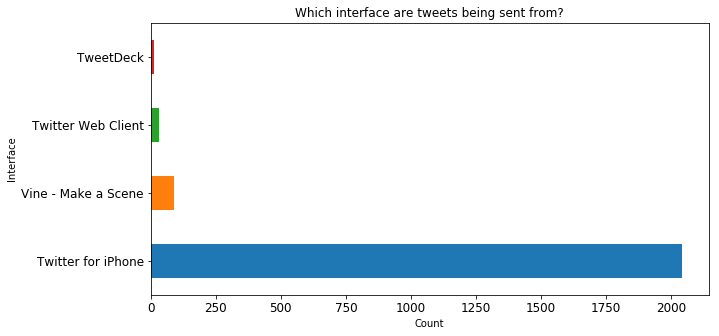

In [170]:
twitter_arch_clean['source'].value_counts().plot(kind='barh',  figsize=(10,5),fontsize=12)
plt.title('Which interface are tweets being sent from?')
plt.xlabel('Count')
plt.ylabel('Interface');

[Return to Table of Contents](#table)
<a id='toptweeted'></a>
### Top 10 tweeted dog breeds

In [171]:
dogs_by_breed = twitter_arch_clean.query('is_it_a_dog==True').groupby('prediction', as_index=False)['is_it_a_dog'].count()
#dogs_by_breed

In [172]:
top_10_dogs_by_breed = dogs_by_breed.nlargest(10,'is_it_a_dog')
#top_10_dogs_by_breed

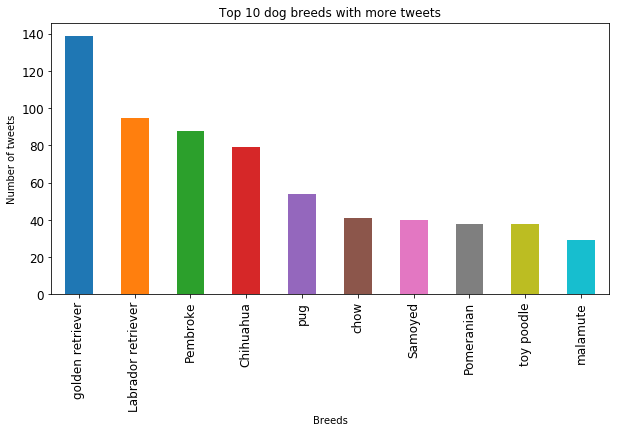

In [173]:
top_10_dogs_by_breed.plot(x='prediction', y='is_it_a_dog' , kind='bar', legend=None, figsize=(10,5),fontsize=12)
plt.title('Top 10 dog breeds with more tweets')
plt.xlabel('Breeds')
plt.ylabel('Number of tweets');

[Return to Table of Contents](#table)
<a id='ratingbybreed'></a>
### Rating means variation by breed    

In [174]:
# Get the tweet images predicted as DOGS, with a denominator of 10
dogs_denominator_10 = twitter_arch_clean.query('rating_denominator== 10 & is_it_a_dog==True & prediction!="clumber"')
rating_mean_by_breed = dogs_denominator_10.groupby(['prediction'], as_index=False)['rating_numerator'].mean()


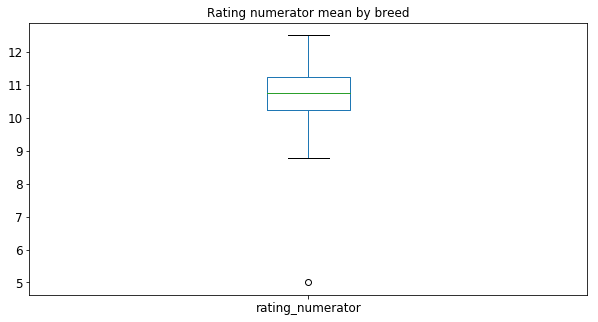

In [175]:
rating_mean_by_breed.plot(x='prediction', y='rating_numerator' , kind='box', legend=None, figsize=(10,5),fontsize=12)
plt.title('Rating numerator mean by breed');

[Return to Table of Contents](#table)
<a id='top10bybreed'></a>
### Top 10 Rating means by breed  

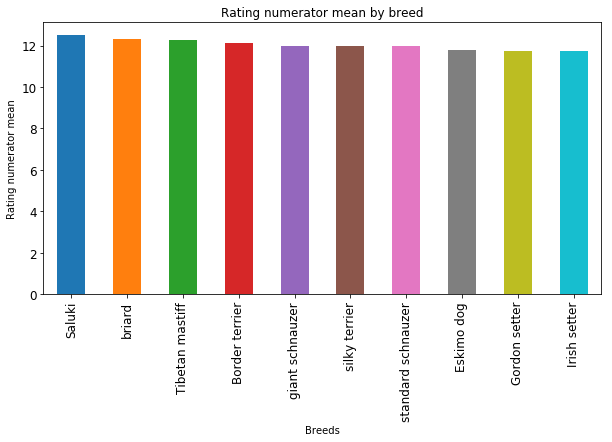

In [176]:
top_10_numerator_by_breed = rating_mean_by_breed.nlargest(10,'rating_numerator')
top_10_numerator_by_breed
top_10_numerator_by_breed.plot(x='prediction', y='rating_numerator' , kind='bar', legend=None, figsize=(10,5),fontsize=12)
plt.title('Rating numerator mean by breed')
plt.xlabel('Breeds')
plt.ylabel('Rating numerator mean');

[Return to Table of Contents](#table)
<a id='ref'></a>
## References found in the Project Details
Get tweets with specific id
https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

Handling Exceptions in Python
https://wiki.python.org/moin/HandlingExceptions

Twitter's rate limiting info page:
https://developer.twitter.com/en/docs/basics/rate-limiting

Measure time elapsed in Python?
https://stackoverflow.com/questions/7370801/measure-time-elapsed-in-python

Setting the wait_on_rate_limit and wait_on_rate_limit_notify parameters to True in the tweepy.api class
http://docs.tweepy.org/en/v3.2.0/api.html#API

Reading and Writing JSON to a File in Python
https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/


## More References <p>
How to get API Keys and Tokens for Twitter
https://www.slickremix.com/docs/how-to-get-api-keys-and-tokens-for-twitter/

Tweepi API
http://docs.tweepy.org/en/v3.6.0/api.html

Confused by python file mode “w+”
https://stackoverflow.com/questions/16208206/confused-by-python-file-mode-w

Why are there no ++ and -- operators in Python?
https://stackoverflow.com/questions/3654830/why-are-there-no-and-operators-in-python

Loading a file with more than one line of JSON into Python's Pandas<p>
https://stackoverflow.com/questions/30088006/loading-a-file-with-more-than-one-line-of-json-into-pythons-pandas
    
Tool for evaluating regular expressions https://pythex.org/ 

Regular Expression HOWTO https://docs.python.org/3/howto/regex.html 

Querying for NaN and other names in Pandas
https://stackoverflow.com/questions/26535563/querying-for-nan-and-other-names-in-pandas

How to reset index in a pandas data frame? 
https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-data-frame
    
Handling Missing Data 
https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

Null and missing data in Python  http://www.residentmar.io/2016/06/12/null-and-missing-data-python.html

What is the difference between NaN and None?
https://stackoverflow.com/questions/17534106/what-is-the-difference-between-nan-and-none

6 ways to Sort Pandas Dataframe: Pandas Tutorial http://cmdlinetips.com/2018/02/how-to-sort-pandas-dataframe-by-columns-and-row/

List Comprehensions in Python  https://www.pythonforbeginners.com/basics/list-comprehensions-in-python

How to hide code from cells in ipython notebook visualized with nbviewer?<p>
https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer